# **Finanzas Computacionales**

# **Taller 1**

*Juan Esteban Gonzalez - David Gonzalez*

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

##Punto 1

In [ ]:
#activos = ["TSLA","NFLX"]
#datos1 = yf.download(activos,start="2021-01-01",end="2022-12-31")
#precios1=datos1["Adj Close"]

In [ ]:
tickers = ["C","JPM"]
start = "2021-01-01"
end = "2022-12-31"
datos1 = pdr.get_data_yahoo(tickers,start=start,end = end)
precios1_mes = pdr.get_data_yahoo(tickers,start=start,end = end,interval="1mo")["Adj Close"]
precios1 = datos1["Adj Close"]
precios1

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


,C,JPM
Date,,
2021-01-04,55.554752,118.156822
2021-01-05,56.995808,118.799759
2021-01-06,60.275158,124.378105
2021-01-07,60.986450,128.462570
2021-01-08,60.386009,128.604401
...,...,...
2022-12-23,43.827736,130.317398
2022-12-27,43.956470,130.774033
2022-12-28,44.184223,131.488754


# **A**

In [ ]:
retornos_dia1 = np.log(precios1/precios1.shift()).dropna()
retornos_mes1 = np.log(precios1_mes/precios1_mes.shift()).dropna()
retornos_anual1 = retornos_dia1.mean()*252
retornos_anual1

C     -0.108141
JPM    0.059844
dtype: float64

In [ ]:
retornos_anual1=pd.DataFrame(retornos_anual1)
retornos_mes1mu=pd.DataFrame(retornos_mes1.mean())
retornos_dia1mu=pd.DataFrame(retornos_dia1.mean())
tabla1=pd.concat([retornos_dia1mu,retornos_mes1mu,retornos_anual1],axis=1)
tabla1.columns=['Diario','Mensual','Anual']
tabla1

,Diario,Mensual,Anual
C,-0.000429,-0.007783,-0.108141
JPM,0.000237,0.004227,0.059844


# **B**

In [ ]:
mu = retornos_dia1.mean()*252 
mu


C     -0.108141
JPM    0.059844
dtype: float64

In [ ]:
sigma = retornos_dia1.std()*np.sqrt(252) 
sigma

C      0.295769
JPM    0.259438
dtype: float64

# **C**

In [ ]:
descriptiva = retornos_dia1.describe()
k = pd.DataFrame(retornos_dia1.kurt()).T
k.rename(index={0:'Kurtosis'}, inplace=True)
s = pd.DataFrame(retornos_dia1.skew()).T
s.rename(index={0:'Asimetria'}, inplace=True)
pd.concat([descriptiva, k,s], axis=0)

,C,JPM
count,502.000000,502.000000
mean,-0.000429,0.000237
std,0.018632,0.016343
min,-0.071781,-0.063433
25%,-0.012631,-0.009786
50%,-0.000921,-0.000336
75%,0.009950,0.011129
max,0.124257,0.060033
Kurtosis,4.584114,0.888907
Asimetria,0.807631,0.093057


# **D**

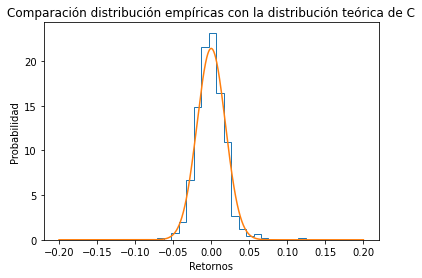

In [ ]:
from scipy.stats import norm 
x = np.linspace(-0.2, 0.2, num = 1000)
plt.hist(retornos_dia1["C"], density=True, histtype='step', bins=20)
plt.xlabel('Retornos')
plt.ylabel('Probabilidad')
plt.title("Comparación distribución empíricas con la distribución teórica de C")
plt.plot(x,norm.pdf(x,scale=retornos_dia1["C"].std()))
plt.show();

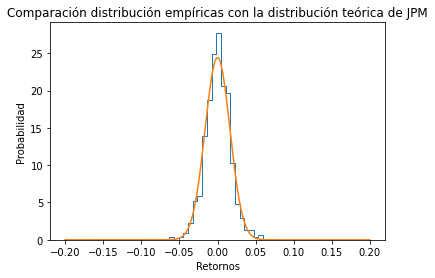

In [ ]:
from scipy.stats import norm 
x = np.linspace(-0.2, 0.2, num = 1000)
plt.hist(retornos_dia1["JPM"], density=True, histtype='step', bins=20)
plt.xlabel('Retornos')
plt.ylabel('Probabilidad')
plt.title("Comparación distribución empíricas con la distribución teórica de JPM")
plt.plot(x,norm.pdf(x,scale=retornos_dia1["JPM"].std()))
plt.show();

# **E**

In [ ]:
#Correlación de Pearson
pearson = retornos_dia1['C'].corr(retornos_dia1['JPM'])
pearson

0.8082190881247802

In [ ]:
#Correlación de Kendall
kendall = retornos_dia1['C'].corr(retornos_dia1['JPM'], method='kendall')
kendall

0.6553029399368595

In [ ]:
#Correlacion Spearman
Spearman = retornos_dia1['C'].corr(retornos_dia1['JPM'], method='spearman')
Spearman

0.843240910004344

In [ ]:
direct_caract = { 'Valor': [pearson,kendall,Spearman]}
m_corr = pd.DataFrame(direct_caract,index=["Pearson","Kendall","Spearman"])
m_corr


,Valor
Pearson,0.808219
Kendall,0.655303
Spearman,0.843241


# **F**

In [ ]:
D , p =st.kstest(retornos_dia1['C'],'norm')
p

1.126674230080216e-106

In [ ]:
D , p =st.kstest(retornos_dia1['JPM'],'norm')
p

1.574266006437976e-106

##Punto 2


# **A**

In [ ]:
activos = ["TSLA","NFLX",'AAPL','MSFT','V','TSM','JNJ','DIS','PEP','KO']
datos2 = pdr.get_data_yahoo(activos,start="2017-12-01",end="2022-12-31", interval = "1mo")
precios2=datos2["Adj Close"]
retornos2=np.log(precios2/precios2.shift()).dropna()
mu2=retornos2.mean()*12
sigma2=retornos2.std()*np.sqrt(12)
mu2

[*********************100%***********************]  10 of 10 completed


AAPL    0.234476
DIS    -0.035433
JNJ     0.073348
KO      0.097156
MSFT    0.218191
NFLX    0.085856
PEP     0.109881
TSLA    0.356156
TSM     0.154080
V       0.126569
dtype: float64

# **B**

In [ ]:
from numpy.core.fromnumeric import sort
mu2=pd.DataFrame(mu2,columns=['RE'])
order_shares=mu2.sort_values('RE',ascending=False)
order_shares

,RE
TSLA,0.356156
AAPL,0.234476
MSFT,0.218191
TSM,0.154080
V,0.126569
PEP,0.109881
KO,0.097156
NFLX,0.085856
JNJ,0.073348
DIS,-0.035433


# Punto 3

In [ ]:
activo = ["^RUT"]
datos3 = pdr.get_data_yahoo(activo,start="2017-12-01",end="2022-12-31",interval="1mo")
precios3=datos3["Adj Close"]
retornos3=np.log(precios3/precios3.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


# **A**

In [ ]:
Desv_mes = retornos3.std()
Desv_mes

0.0690985636809896

In [ ]:
Desv_año = Desv_mes * np.sqrt(12)
Desv_año 

0.23936444605101503

# **B**

0.0628038766843747

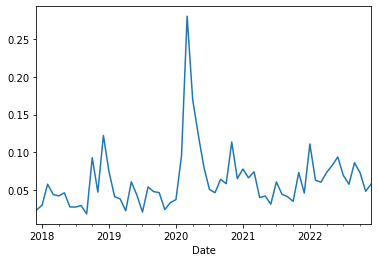

In [ ]:
lnHL = np.log(datos3["High"]/datos3["Low"]).dropna()
sigmaPark_m = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_m.plot();
pd.Series(sigmaPark_m).mean()

In [ ]:
sigmaPark_a = (sigmaPark_m.mean())*np.sqrt(12)
sigmaPark_a

0.21755901065925476

# **C**

0.06439313025275432

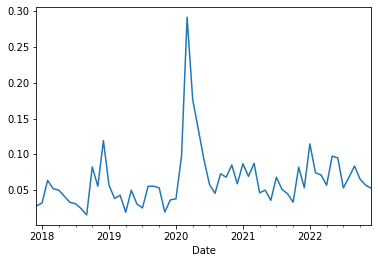

In [ ]:
lnHL = np.log(datos3["High"]/datos3["Low"]).dropna()
lnCO = np.log(datos3["Close"]/datos3["Open"]).dropna()
sigmaGK_m = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_m.plot();
pd.Series(sigmaGK_m).mean()

In [ ]:
sigmaGK_a = (sigmaGK_m.mean())*np.sqrt(12)
sigmaGK_a

0.22306434651234205

# **D**

In [ ]:
def ewma_vol(retornos3,Lambda):
  k = len(retornos3)                     
  e = np.arange(k-1,-1,-1)             
  alpha = Lambda**e                    
  s_var = (retornos3**2)*alpha           
  var = s_var.sum()*(1-Lambda)         
  vol = np.sqrt(var)                   
  return(vol)

In [ ]:
vol_ewmaM = ewma_vol(retornos3,Lambda=0.94)
vol_ewmaM

0.06806446951201864

In [ ]:
vol_ewmaA = vol_ewmaM*np.sqrt(12)
vol_ewmaA

0.2357822387700782